In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from Helpers import eda

import warnings
warnings.filterwarnings("ignore")
# Kütüphaneleri yükledik

In [2]:
dataset=pd.read_csv("titanic.csv") #datasetimizi yükledik

In [3]:
eda.head(dataset,6) # ilk 6 değerimizi aldık

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

In [4]:
dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True) 
#Kullanmayacağım veya makine öğrenmesinde sorun çıkaracak kolonları kaldırdım 

In [5]:
eda.dtypes(dataset) #kolonlarımızın tip değerlerini aldık

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [6]:
eda.info(dataset) # datasetimiz hakkında bilgi edindik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [7]:
eda.isNullSum(dataset) # toplam boş değerleri gruplayarak yazdırdım 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [8]:
eda.shape(dataset) # verimizin şeklini öğrendik

(891, 8)


In [9]:
eda.columns(dataset) #kolon isimlerini aldık 

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [10]:
dataset.rename(columns={'Survived':'Hayatta Kalma',"Pclass":"Bilet Sınıfı",
                        'Sex':"Cinsiyet",'Age':"Yaş", 'SibSp':"Eş/Kardeş Sayısı", 
                        'Parch':"Ebeveyn/Çocuk Sayısı", 'Fare':"Bilet Ücreti", 
                        'Embarked':"Biniş Yaptığı Liman"},inplace=True) 
# Kolon isimlerini türkçe ye çevirdim

In [11]:
dataset

,Hayatta Kalma,Bilet Sınıfı,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Biniş Yaptığı Liman
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
eda.describe(dataset)

       Hayatta Kalma  Bilet Sınıfı         Yaş  Eş/Kardeş Sayısı  \
count     891.000000    891.000000  714.000000        891.000000   
mean        0.383838      2.308642   29.699118          0.523008   
std         0.486592      0.836071   14.526497          1.102743   
min         0.000000      1.000000    0.420000          0.000000   
25%         0.000000      2.000000   20.125000          0.000000   
50%         0.000000      3.000000   28.000000          0.000000   
75%         1.000000      3.000000   38.000000          1.000000   
max         1.000000      3.000000   80.000000          8.000000   

       Ebeveyn/Çocuk Sayısı  Bilet Ücreti  
count            891.000000    891.000000  
mean               0.381594     32.204208  
std                0.806057     49.693429  
min                0.000000      0.000000  
25%                0.000000      7.910400  
50%                0.000000     14.454200  
75%                0.000000     31.000000  
max                6.000000    512.

In [13]:
eda.describeT(dataset)

                      count       mean        std   min      25%      50%  \
Hayatta Kalma         891.0   0.383838   0.486592  0.00   0.0000   0.0000   
Bilet Sınıfı          891.0   2.308642   0.836071  1.00   2.0000   3.0000   
Yaş                   714.0  29.699118  14.526497  0.42  20.1250  28.0000   
Eş/Kardeş Sayısı      891.0   0.523008   1.102743  0.00   0.0000   0.0000   
Ebeveyn/Çocuk Sayısı  891.0   0.381594   0.806057  0.00   0.0000   0.0000   
Bilet Ücreti          891.0  32.204208  49.693429  0.00   7.9104  14.4542   

                       75%       max  
Hayatta Kalma          1.0    1.0000  
Bilet Sınıfı           3.0    3.0000  
Yaş                   38.0   80.0000  
Eş/Kardeş Sayısı       1.0    8.0000  
Ebeveyn/Çocuk Sayısı   0.0    6.0000  
Bilet Ücreti          31.0  512.3292  


In [14]:
eda.unique(dataset,"Cinsiyet") # Cinsiyetteki benzersiz tür sayısını döndürür.

array(['male', 'female'], dtype=object)

In [15]:
eda.describe_function(dataset) # Hem describe i gösterir hemde null değer var mı 

                      count       mean        std   min      25%      50%  \
Hayatta Kalma         891.0   0.383838   0.486592  0.00   0.0000   0.0000   
Bilet Sınıfı          891.0   2.308642   0.836071  1.00   2.0000   3.0000   
Yaş                   714.0  29.699118  14.526497  0.42  20.1250  28.0000   
Eş/Kardeş Sayısı      891.0   0.523008   1.102743  0.00   0.0000   0.0000   
Ebeveyn/Çocuk Sayısı  891.0   0.381594   0.806057  0.00   0.0000   0.0000   
Bilet Ücreti          891.0  32.204208  49.693429  0.00   7.9104  14.4542   

                       75%       max  
Hayatta Kalma          1.0    1.0000  
Bilet Sınıfı           3.0    3.0000  
Yaş                   38.0   80.0000  
Eş/Kardeş Sayısı       1.0    8.0000  
Ebeveyn/Çocuk Sayısı   0.0    6.0000  
Bilet Ücreti          31.0  512.3292  
Null var mı?  True


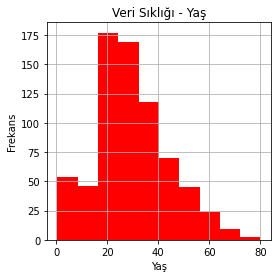

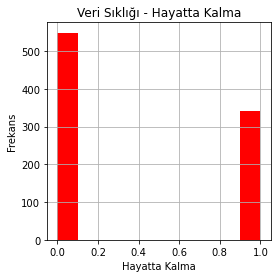

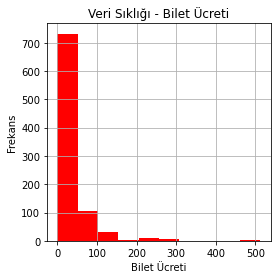

In [16]:
eda.histogram(dataset,"Yaş","Hayatta Kalma","Bilet Ücreti")
# Verilen sütundaki değerlerden sütunda kaç adet olduğunu göstremek için 

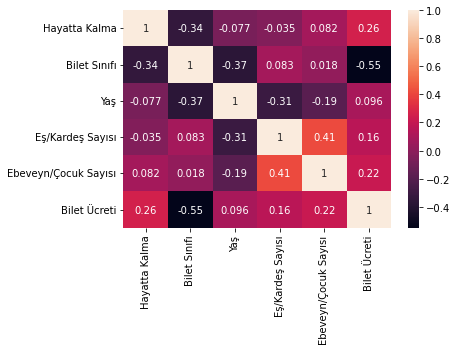

In [17]:
eda.heatMap(dataset) 
# kolonlar arasındaki korelsyonu veren grafiktir 
# iki sütun arasındaki korelasyon değeri -1 veya 1 e yaklaştıkça ilişki kuvvetleniyor 0 a yaklaştıkça ilişki azalır.
# -1 negatif güçlü ilişki 1 pozitif güçlü ilişki 0 ilişki yok 

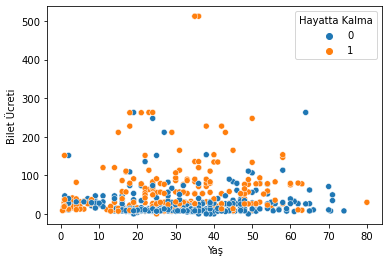

In [18]:
eda.scatter(df=dataset,column1="Yaş",column2="Bilet Ücreti",hue="Hayatta Kalma") 
# Genelde yüksek ücret verenler hayatta kalmış.

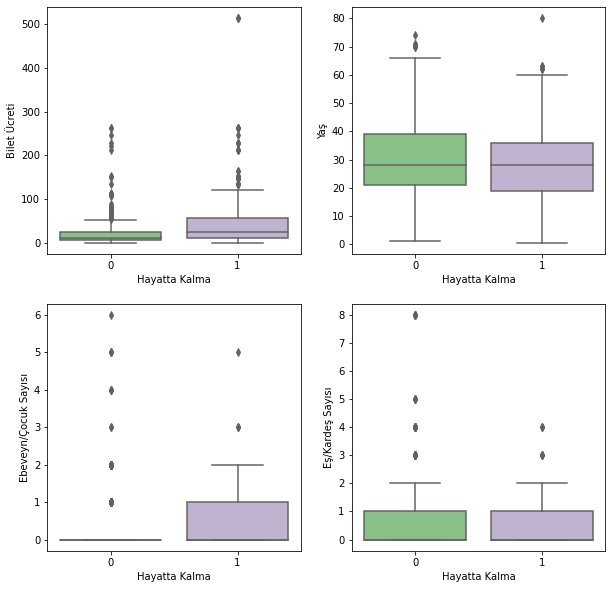

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(221)
eda.box_plot(dataset,"Hayatta Kalma",'Bilet Ücreti')
# ölenlerin mini 0 civarında maxı 60 civarında sola yatkın pozitifdir. 
# yaşayanların mini 0 civarında maxı 60 civarında sola yatkın pozitifdir. Min max değeri ölenlere göre daha 
# arası uzaklık fazla.

plt.subplot(222)
eda.box_plot(dataset,"Hayatta Kalma",'Yaş')
# ölenlerin mini 0 civarında maxı 60-70 arasında medyan 30-20 arasında . 
# yaşayanların mini 0 civarında maxı 60 dır ,medyan 30-20 arasında.

plt.subplot(223)
eda.box_plot(dataset,"Hayatta Kalma",'Ebeveyn/Çocuk Sayısı')
# ölenlerin mini 0 civarında maxı 0 arasında medyan 0 . 
# yaşayanların mini 0 civarında maxı 2 dır .

plt.subplot(224)
eda.box_plot(dataset,"Hayatta Kalma",'Eş/Kardeş Sayısı')
# ölenlerin mini 0 civarında maxı 2 arasında medyan 0 . 
# yaşayanların mini 0 civarında maxı 2 dır .

plt.show()
# Gauss grafiği sola yatkın pozitifdir. Gauss grafiği sağa yatkın negatifdir. 

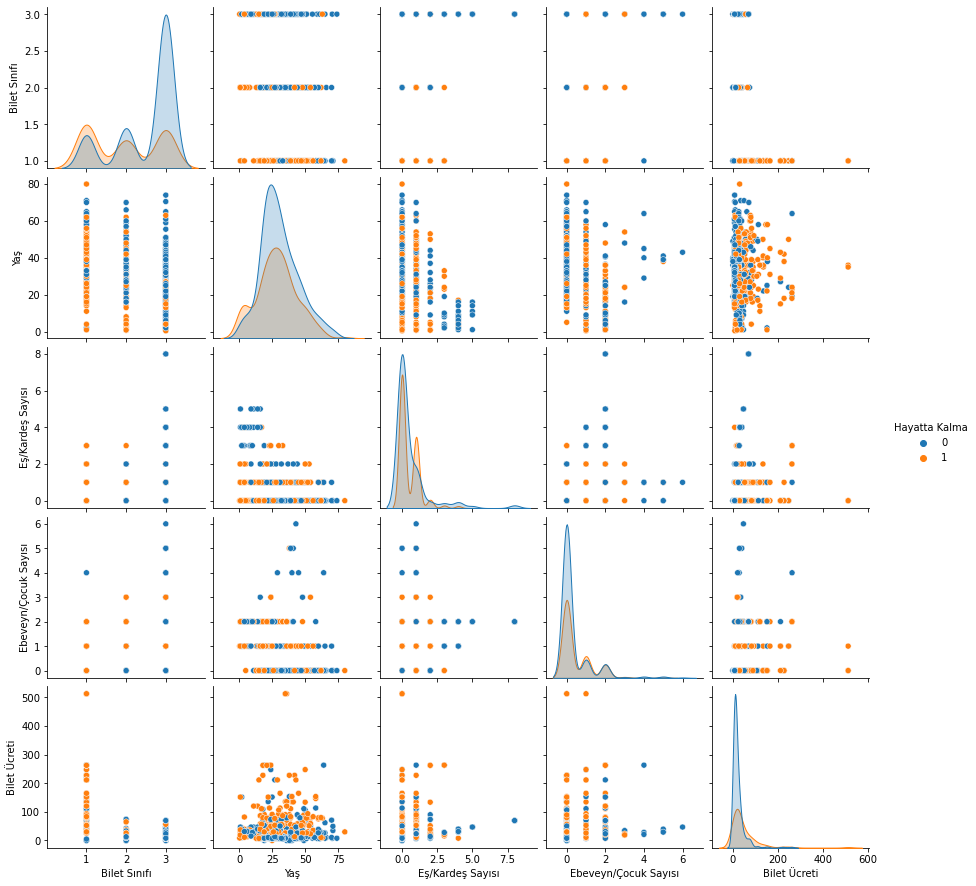

In [20]:
eda.pairplot(dataset,hue="Hayatta Kalma") # sayısal olan sütunlar arasında ilişkinin nasıl olduğu incelenmiştir.
# Yaş ve bilet ücreti model eğitimede kulllanılabilir çünkü güzel ayrılabilir.

In [21]:
eda.isNullSum(dataset) 

Hayatta Kalma             0
Bilet Sınıfı              0
Cinsiyet                  0
Yaş                     177
Eş/Kardeş Sayısı          0
Ebeveyn/Çocuk Sayısı      0
Bilet Ücreti              0
Biniş Yaptığı Liman       2
dtype: int64


In [22]:
dataset["Yaş"].fillna(np.round(dataset["Yaş"].mean(),0),inplace=True)
#yaş sütununu yaş sütunun ortalaması ile doldurdum.

In [23]:
eda.isNullSum(dataset)

Hayatta Kalma           0
Bilet Sınıfı            0
Cinsiyet                0
Yaş                     0
Eş/Kardeş Sayısı        0
Ebeveyn/Çocuk Sayısı    0
Bilet Ücreti            0
Biniş Yaptığı Liman     2
dtype: int64


In [24]:
eda.valueCounts(dataset,"Biniş Yaptığı Liman")

S    644
C    168
Q     77
Name: Biniş Yaptığı Liman, dtype: int64

In [25]:
dataset["Biniş Yaptığı Liman"].fillna(eda.valueCounts(dataset,"Biniş Yaptığı Liman").index[0],inplace=True)
#biniş yaptığı liman kolonunda boş değerleri en çok tekrar eden s ile doldurdum.

In [26]:
eda.isNullSum(dataset)

Hayatta Kalma           0
Bilet Sınıfı            0
Cinsiyet                0
Yaş                     0
Eş/Kardeş Sayısı        0
Ebeveyn/Çocuk Sayısı    0
Bilet Ücreti            0
Biniş Yaptığı Liman     0
dtype: int64


In [27]:
dataset.duplicated().sum() # Tekrar eden verilerin sayısını aldık

118

In [28]:
dataset[dataset["Yaş"]<0].values.sum() # Yaş sütunumuzda negatif değer var mı diye kontrol ettik 

0

In [29]:
from Helpers import data_prep 

In [30]:
data_prep.outlier_thresholds(dataset,"Yaş") 
#Yaş sütunun 1. kartil,3 kartil, 1. ve 3. kartil değer aralığını ve min max değerlerini hesapladık.

(-66.0, 126.0)

In [31]:
data_prep.check_outlier(dataset,"Yaş") # Yaş sütununda aykırı bir değer var mı kontrolü yapıldı

False

In [32]:
data_prep.outlier_thresholds(dataset,"Bilet Ücreti")
#Bilet Ücreti sütunun 1. kartil,3 kartil, 1. ve 3. kartil değer aralığını ve min max değerlerini hesapladık.

(-150.056225, 269.360375)

In [33]:
dataset[dataset["Bilet Ücreti"]<0].values.sum()  # Yaş sütunumuzda negatif değer var mı diye kontrol ettik 

0

In [34]:
data_prep.check_outlier(dataset,"Bilet Ücreti") # Yaş sütununda aykırı bir değer var mı kontrolü yapıldı

True

In [35]:
data_prep.grab_outliers(dataset,"Bilet Ücreti") # aykırı değerleri geri dödürdük (datafarame olarak)

,Hayatta Kalma,Bilet Sınıfı,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Biniş Yaptığı Liman
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [36]:
data_prep.replace_with_thresholds(dataset,"Bilet Ücreti",q1=0.05,q3=0.95) 
#datasetinde veri kaybı yaşanmaması için aykırı değerler silinmeyip sınır min max değerlerine eşitlendi.

,Hayatta Kalma,Bilet Sınıfı,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Biniş Yaptığı Liman
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [37]:
data_prep.check_outlier(dataset,"Bilet Ücreti") # Yaş sütununda aykırı bir değer var mı kontrolü yapıldı

False

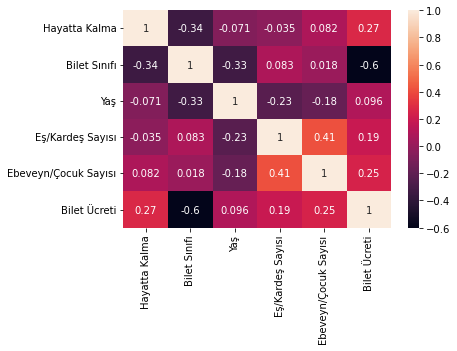

In [38]:
eda.heatMap(dataset)
# kolonlar arasındaki korelsyonu veren grafiktir 
# iki sütun arasındaki korelasyon değeri -1 veya 1 e yaklaştıkça ilişki kuvvetleniyor 0 a yaklaştıkça ilişki azalır.
# -1 negatif güçlü ilişki 1 pozitif güçlü ilişki 0 ilişki yok 

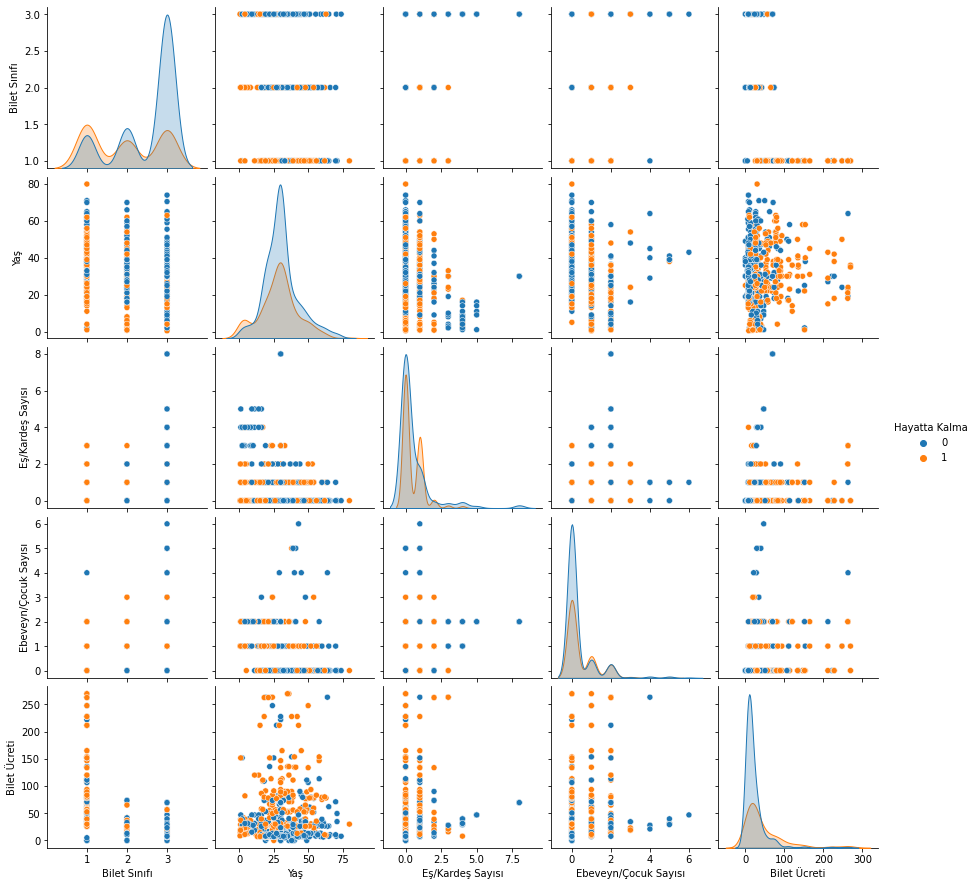

In [39]:
eda.pairplot(dataset,hue="Hayatta Kalma") # sayısal olan sütunlar arasında ilişkinin nasıl olduğu incelenmiştir.
# Yaş ve bilet ücreti model eğitimede kulllanılabilir çünkü güzel ayrılabilir.

In [40]:
dataset.head()

,Hayatta Kalma,Bilet Sınıfı,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Biniş Yaptığı Liman
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
dataset=data_prep.one_hot_encoder(dataset,"Bilet Sınıfı",drop_first=True)
#biletSınıfı sütunundaki ordinal değerleri colonlara ayırdık ve bilet sınıfı kolonunu sildik.

In [42]:
dataset=data_prep.one_hot_encoder(dataset,"Biniş Yaptığı Liman",drop_first=True)
#Biniş Yaptığı Liman sütunundaki ordinal değerleri colonlara ayırdık ve bilet sınıfı kolonunu sildik.

In [43]:
dataset

,Hayatta Kalma,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,2,3,Q,S
0,0,male,22.0,1,0,7.2500,0,1,0,1
1,1,female,38.0,1,0,71.2833,0,0,0,0
2,1,female,26.0,0,0,7.9250,0,1,0,1
3,1,female,35.0,1,0,53.1000,0,0,0,1
4,0,male,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,1,0,0,1
887,1,female,19.0,0,0,30.0000,0,0,0,1
888,0,female,30.0,1,2,23.4500,0,1,0,1
889,1,male,26.0,0,0,30.0000,0,0,0,0


In [44]:
data_prep.label_encoder(dataset,"Cinsiyet")

,Hayatta Kalma,Cinsiyet,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,2,3,Q,S
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,1,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,0,1
888,0,0,30.0,1,2,23.4500,0,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0,0


In [45]:
dataset.rename(columns={2:"Bilet Sınıfı 2",3:"Bilet Sınıfı 3",
                       "Q":"Biniş Limanı Q","S":"Biniş Limanı S",
                        "Cinsiyet":"Erkek"},inplace=True) # Kolon isimleri anlaşılmaz olduğu için değiştirildi.

In [46]:
dataset

,Hayatta Kalma,Erkek,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Bilet Sınıfı 2,Bilet Sınıfı 3,Biniş Limanı Q,Biniş Limanı S
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,1,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,0,1
888,0,0,30.0,1,2,23.4500,0,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0,0


In [47]:
x=dataset.iloc[:,1:]
y=dataset.iloc[:,:1]
# Dataset x(bağımsız) ve y(bağımlı) olarak ayrıldı.

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#x ve y datalarımızı train ve test olarak üzere 2 ye ayırdım.


In [49]:
x_test

,Erkek,Yaş,Eş/Kardeş Sayısı,Ebeveyn/Çocuk Sayısı,Bilet Ücreti,Bilet Sınıfı 2,Bilet Sınıfı 3,Biniş Limanı Q,Biniş Limanı S
495,1,30.0,0,0,14.4583,0,1,0,0
648,1,30.0,0,0,7.5500,0,1,0,1
278,1,7.0,4,1,29.1250,0,1,1,0
31,0,30.0,1,0,146.5208,0,0,0,0
255,0,29.0,0,2,15.2458,0,1,0,0
...,...,...,...,...,...,...,...,...,...
263,1,40.0,0,0,0.0000,0,0,0,1
718,1,30.0,0,0,15.5000,0,1,1,0
620,1,27.0,1,0,14.4542,0,1,0,0
786,0,18.0,0,0,7.4958,0,1,0,1


In [50]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_test=mms.fit_transform(x_test)
x_train=mms.fit_transform(x_train)
# x test ve x train değerlerini scaler ettik. Ben burada MinMaxScaler fonksiyonunu kullanndım ve
# değerleri 0-1 arasına dönüştürdük.

In [51]:
x_test

array([[1.        , 0.42208904, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.42208904, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.09389269, 0.8       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.37928082, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.25085616, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.42208904, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
a_scores=[]
metrics=["euclidean","chebyshev","minkowski","jaccard","hamming","canberra"]
for i in metrics:
    for j in range(1,11,2):
        a_scores.append(f"Metric-> {i} ve n_neighbors->{j}")
        from sklearn.neighbors import KNeighborsClassifier
        knn= KNeighborsClassifier(n_neighbors=j,metric=i)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        from sklearn.metrics import confusion_matrix,accuracy_score
        cm=confusion_matrix(y_test,y_pred)
        a_scores.append(cm)
        a_score=accuracy_score(y_test,y_pred)
        a_scores.append(a_score)
a_scores
#knn sınıflandırma algoritması en iyi değer(0.8134328358208955) Metric-> hamming ve n_neighbors->3 ile elde edildi. 

['Metric-> euclidean ve n_neighbors->1',
 array([[144,  24],
        [ 36,  64]]),
 0.7761194029850746,
 'Metric-> euclidean ve n_neighbors->3',
 array([[141,  27],
        [ 31,  69]]),
 0.7835820895522388,
 'Metric-> euclidean ve n_neighbors->5',
 array([[142,  26],
        [ 31,  69]]),
 0.7873134328358209,
 'Metric-> euclidean ve n_neighbors->7',
 array([[145,  23],
        [ 35,  65]]),
 0.7835820895522388,
 'Metric-> euclidean ve n_neighbors->9',
 array([[151,  17],
        [ 37,  63]]),
 0.7985074626865671,
 'Metric-> chebyshev ve n_neighbors->1',
 array([[139,  29],
        [ 36,  64]]),
 0.7574626865671642,
 'Metric-> chebyshev ve n_neighbors->3',
 array([[142,  26],
        [ 35,  65]]),
 0.7723880597014925,
 'Metric-> chebyshev ve n_neighbors->5',
 array([[141,  27],
        [ 34,  66]]),
 0.7723880597014925,
 'Metric-> chebyshev ve n_neighbors->7',
 array([[147,  21],
        [ 37,  63]]),
 0.7835820895522388,
 'Metric-> chebyshev ve n_neighbors->9',
 array([[151,  17],
   

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3,metric="hamming")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
# Knn fonksiyonuna paramtre olarak n_neighbors -> 3 ve metric-> "hamming" verildi en iyi sonuç için .
# en yakın komşu değerine tek rakamlar genelde daha çok veriliyor nedeni ise çift rakamlarda işlemlerin uzaması 
# Eğer 4 vb. çift rakam verildiğinde en yakın 4 komuşunun sonrada uzaklıklarının hesaplanmasından dolayı 
# Uzaklığın hesaplanmasının nedeni en yakın örnek olarak 2 farklı sınıftan da eşit sayıda knn olursa uzaklığa bakılır.

In [54]:
def incele(y_test,y_pred,plot=False,color="Oranges"):
    from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
    if plot:
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,cmap=color,cbar=None,annot=True,fmt='.3g')
        plt.title("Hata Matrisi")
        plt.ylabel("Gerçek")
        plt.xlabel("Tahmin")
        plt.show()
    print("Accuracy Score -> ",accuracy_score(y_test,y_pred))
    print("Recall Score -> ",recall_score(y_test,y_pred))
    print("Precision Score -> ",precision_score(y_test,y_pred))
    print("F1 Score -> ",f1_score(y_test,y_pred))
    return accuracy_score(y_test,y_pred)

# Burada ise incele adında bir fonksiyon oluşturdum nedeni ise sürekli her sıralama algoritmasından sonra yapılması.
# incele fonksiyonu aldığı y_test ve y_pred parametreleri ile Accuracy Score,Recall Score,Precision Score,F1 Score 
# ve plot parametresine True verilirse hata matrisi de çizilir color zaten matrisin rengini beliriler.
# hata matrisinin gerçek 0, tahmin 0 True Negatif ; gerçek 0,tahmin 1 False pozitif ; gerçek 1, tahmin 0 False Negatif
# gerçek 1 tahmin 1 True Pozitif 'dir.
# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Accuracy =(TruePositives+TrueNegaitives)/(TruePositives+TrueNegaitives+FalsePositives+FalseNegatives)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall) 

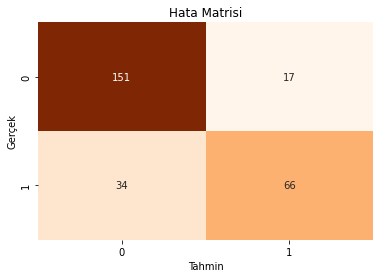

Accuracy Score ->  0.8097014925373134
Recall Score ->  0.66
Precision Score ->  0.7951807228915663
F1 Score ->  0.7213114754098361


In [55]:
knn_accuracy_score=incele(y_test,y_pred,plot=True)

In [56]:
from sklearn.svm import SVC
metrics=["linear","poly","rbf","sigmoid"]
liste = []
for metric in metrics:
    liste.append(f"Metric-> {metric} ")
    svc=SVC(kernel=metric)
    svc=svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred) 
    accuary_s=(accuracy_score(y_test, y_pred))
    liste.append(cm)
    liste.append(accuary_s)

liste
# for döngüsü ile metrikleri liste içinden aldım .
# en iyi değer rbf ve poly metriğinde alındı.
# ben burada metric olarak rbf i seçeceğim

['Metric-> linear ',
 array([[140,  28],
        [ 29,  71]]),
 0.7873134328358209,
 'Metric-> poly ',
 array([[158,  10],
        [ 41,  59]]),
 0.8097014925373134,
 'Metric-> rbf ',
 array([[159,   9],
        [ 42,  58]]),
 0.8097014925373134,
 'Metric-> sigmoid ',
 array([[126,  42],
        [ 38,  62]]),
 0.7014925373134329]

In [57]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc=svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
# destek vektör sınıflandırma algoritmasına rbfi kullandım.

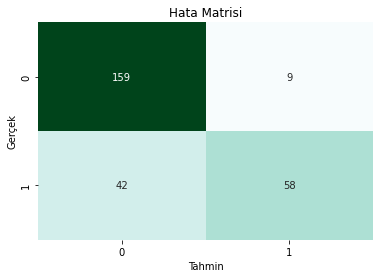

Accuracy Score ->  0.8097014925373134
Recall Score ->  0.58
Precision Score ->  0.8656716417910447
F1 Score ->  0.6946107784431137


In [58]:
svc_accuracy_score=incele(y_test,y_pred,plot=True,color="BuGn")

In [59]:
from xgboost import XGBClassifier
for i in range(11):
    xgbc=XGBClassifier(max_depth=i,eval_metric='rmse')
    xgbc.fit(x_train,y_train)
    y_pred=xgbc.predict(x_test)
    incele(y_test,y_pred)
# for ile 1 ila 10 arasında derinlik verildi 
# En büyük accuracy değeri max_depth=2 de geldi. -> (0.835820895522388)

Accuracy Score ->  0.6268656716417911
Recall Score ->  0.0
Precision Score ->  0.0
F1 Score ->  0.0
Accuracy Score ->  0.832089552238806
Recall Score ->  0.69
Precision Score ->  0.8313253012048193
F1 Score ->  0.7540983606557377
Accuracy Score ->  0.8470149253731343
Recall Score ->  0.73
Precision Score ->  0.8390804597701149
F1 Score ->  0.7807486631016043
Accuracy Score ->  0.8208955223880597
Recall Score ->  0.66
Precision Score ->  0.825
F1 Score ->  0.7333333333333334
Accuracy Score ->  0.8134328358208955
Recall Score ->  0.64
Precision Score ->  0.8205128205128205
F1 Score ->  0.7191011235955057
Accuracy Score ->  0.7985074626865671
Recall Score ->  0.65
Precision Score ->  0.7738095238095238
F1 Score ->  0.7065217391304347
Accuracy Score ->  0.8059701492537313
Recall Score ->  0.63
Precision Score ->  0.8076923076923077
F1 Score ->  0.7078651685393258
Accuracy Score ->  0.7947761194029851
Recall Score ->  0.62
Precision Score ->  0.7848101265822784
F1 Score ->  0.69273743016759

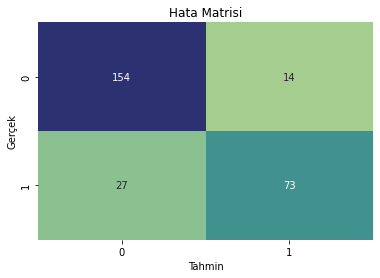

Accuracy Score ->  0.8470149253731343
Recall Score ->  0.73
Precision Score ->  0.8390804597701149
F1 Score ->  0.7807486631016043


In [60]:
xgbc=XGBClassifier(eval_metric='rmse',max_depth=2)
xgbc.fit(x_train,y_train)
y_pred=xgbc.predict(x_test)
xgbc_accuracy_score=incele(y_test,y_pred,plot=True,color="crest")

In [61]:
Algorithms =["KNN","SVC","XGBClassifier"]
accuracy_scores=[knn_accuracy_score,svc_accuracy_score,xgbc_accuracy_score]
for i in range(3):
    print(f"{Algorithms[i]} accuracy score değeri -> {accuracy_scores[i]} ")
# en iyi değer XGBClassifier algoritması ile alındı.
# Gradient Boosting algoritması, yalnızca sürekli hedef değişkeni (Regressor olarak) değil, aynı zamanda 
# kategorik hedef değişkeni de (Sınıflandırıcı olarak) tahmin etmek için kullanılabilir. 
# Regresör olarak kullanıldığında hata fonksiyonu Ortalama Kare Hatası (MSE) ve sınıflandırıcı olarak 
# kullanıldığında maliyet fonksiyonu Log Loss’tur.


KNN accuracy score değeri -> 0.8097014925373134 
SVC accuracy score değeri -> 0.8097014925373134 
XGBClassifier accuracy score değeri -> 0.8470149253731343 
